## load data

In [1]:
from numpy import *
from pandas import *
from matplotlib.pylab import *
import torch
import seaborn as sns


## load training data


## for 1 carbon source
train_single=read_csv('./abundance_individuals_for_Christoph.csv')

#split by number of carbon sources
target_single_1=train_single[train_single['number_of_carbons']==1].iloc[:,:14].values
target_single_8=train_single[train_single['number_of_carbons']==8].iloc[:,:14].values
target_single_16=train_single[train_single['number_of_carbons']==16].iloc[:,:14].values

## for pairs
train_pairs=read_csv('./abundance_pairs_for_Christoph.csv')
#split by number of carbon sources
target_pairs_1=train_pairs[train_pairs['number_of_carbons']==1].iloc[:,:14].values
target_pairs_8=train_pairs[train_pairs['number_of_carbons']==8].iloc[:,:14].values
target_pairs_16=train_pairs[train_pairs['number_of_carbons']==16].iloc[:,:14].values

# for commmunity
train_community=read_csv('./training_dat_community.csv')
#split by number of carbon sources
target_community_1=train_community[train_community['number_of_carbons']==1].iloc[:,1:15].values
target_community_8=train_community[train_community['number_of_carbons']==8].iloc[:,1:15].values
target_community_16=train_community[train_community['number_of_carbons']==16].iloc[:,1:15].values

# concatenate training data for different number of species according to carbon sources number
target_1=vstack([target_single_1, target_pairs_1, target_community_1])
target_8=vstack([target_single_8, target_pairs_8, target_community_8])
target_16=vstack([target_single_16, target_pairs_16, target_community_16])

ImportError: dlopen(/Users/oshalev/mambaforge/lib/python3.10/site-packages/PIL/_imaging.cpython-310-darwin.so, 2): Library not loaded: @rpath/libtiff.5.dylib
  Referenced from: /Users/oshalev/mambaforge/lib/python3.10/site-packages/PIL/_imaging.cpython-310-darwin.so
  Reason: image not found

## Obtain alphas self directly
* alpha self in gLV model is inverse of carrying capacity that can be obtained directly from single species populations at steady state

In [ ]:
from aux import safe_inverse
# calculate alphas self from single species data
inverse1=safe_inverse(target_single_1)
inverse8=safe_inverse(target_single_8)
inverse16=safe_inverse(target_single_16)

a_self_1=[]
a_self_8=[]
a_self_16=[]

# just consider alphas that are not 0, and remove those cases where species where =0
for i in inverse1.T:
    a_self_1.append(i[i!=0])

for i in inverse8.T:
    a_self_8.append(i[i!=0])

for i in inverse16.T:
    a_self_16.append(i[i!=0])

NameError: name 'a_self_1' is not defined

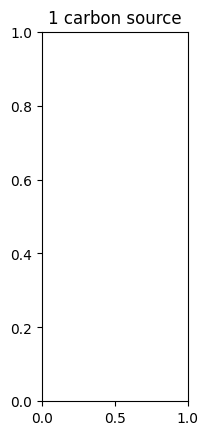

In [3]:
# plot all the alpha_self in scatter plots for each species and nutrient number

# load species identifiers
specs = read_csv('./strains_for_community_exp_101.csv')
specs=specs.iloc[0,:-1].astype(int)
specs['S14']='PA01'


#
plt.subplot(131)
plt.title('1 carbon source')
sns.stripplot(a_self_1)
plt.ylim([0,30])
plt.xticks(arange(14),specs.values, rotation=90)
plt.ylabel(r'$\alpha _{self}$')
plt.xlabel('Species')

plt.subplot(132)
plt.title('8 carbon sources')
sns.stripplot(a_self_8)
plt.ylim([0,30])
plt.xticks(arange(14),specs.values, rotation=90)
plt.xlabel('Species')

plt.subplot(133)
plt.title('16 carbon sources')
sns.stripplot(a_self_16)
plt.ylim([0,30])
plt.xticks(arange(14),specs.values, rotation=90)
plt.xlabel('Species')

savefig('./images/alpha_self_direct_single.pdf', bbox_inches='tight')

In [4]:
means1 = [np.nanmean(arr) for arr in a_self_1]
means8 = [np.nanmean(arr) for arr in a_self_8]
means16 = [np.nanmean(arr) for arr in a_self_16]

for i in range(14):
    plot(array([means1,means8,means16])[:,i],'o-', label=specs.values[i])
plot(([np.nanmean(means1),np.nanmean(means8),np.nanmean(means16)]),lw=4, color='k', label='mean')
legend(ncol=3, loc='upper center', bbox_to_anchor=(.7, .9), title='Species')
ylabel(r'$\alpha_{self}$')
xticks([0,1,2],[1,8,16])
xlabel('Nr carbon sources')
savefig('./images/a_self_direct_mean.pdf', bbox_inches='tight')

NameError: name 'a_self_1' is not defined

## Obtain alpha other directly
* by either inverting the carrying capacity or solvig gLV for alpha 12_

In [5]:
from seaborn import *

dat=read_csv('./df_for_Christoph_pairs_results.csv')
dat_w=read_csv('./df_for_Christoph_pairs_results_wide.csv')
carb=read_csv('./carbon_index_to_number_Christoph.csv')

dat_w['abundanceA']=dat_w['OD']*dat_w['relative_abundance_A']

dat_w['abundanceB']=dat_w['OD']*dat_w['relative_abundance_B']

In [6]:
#remove pairs in which species go fully extinct, or are close to that
te=array([dat_w['relative_abundance_A']>0.001,  dat_w['relative_abundance_B']>0.001]).all(axis=0)
dat_w_f=dat_w[te]

# get carbon indices for different carbon numbers
c1=carb['carbon_index'][carb['number_of_carbons']==1]
c8=carb['carbon_index'][carb['number_of_carbons']==8]
c16=carb['carbon_index'][carb['number_of_carbons']==16]

dat_wf_1=dat_w_f[dat_w_f['carbon_index'].isin(c1)]
dat_wf_8=dat_w_f[dat_w_f['carbon_index'].isin(c8)]
dat_wf_16=dat_w_f[dat_w_f['carbon_index'].isin(c16)]

In [7]:
# calculate alpha self and other from solving steady state gLV expression for according alphas
# 1 carbon source
a11_1= 1/dat_wf_1['OD_individual_A']
x1_1=dat_wf_1['abundanceA']
x2_1=dat_wf_1['abundanceB']
a12_1=(1-a11_1*x1_1)/x2_1

a22_1= 1/dat_wf_1['OD_individual_B']
x1_1=dat_wf_1['abundanceA']
x2_1=dat_wf_1['abundanceB']
a21_1=(1-a22_1*x2_1)/x1_1

# 8 carbon source
a11_8= 1/dat_wf_8['OD_individual_A']
x1_8=dat_wf_8['abundanceA']
x2_8=dat_wf_8['abundanceB']
a12_8=(1-a11_8*x1_8)/x2_8

a22_8= 1/dat_wf_8['OD_individual_B']
x1_8=dat_wf_8['abundanceA']
x2_8=dat_wf_8['abundanceB']
a21_8=(1-a22_8*x2_8)/x1_8

# 16 carbon source
a11_16= 1/dat_wf_16['OD_individual_A']
x1_16=dat_wf_16['abundanceA']
x2_16=dat_wf_16['abundanceB']
a12_16=(1-a11_16*x1_16)/x2_16

a22_16= 1/dat_wf_16['OD_individual_B']
x1_16=dat_wf_16['abundanceA']
x2_16=dat_wf_16['abundanceB']
a21_16=(1-a22_16*x2_16)/x1_16

FileNotFoundError: [Errno 2] No such file or directory: './images/alphas_directly.pdf'

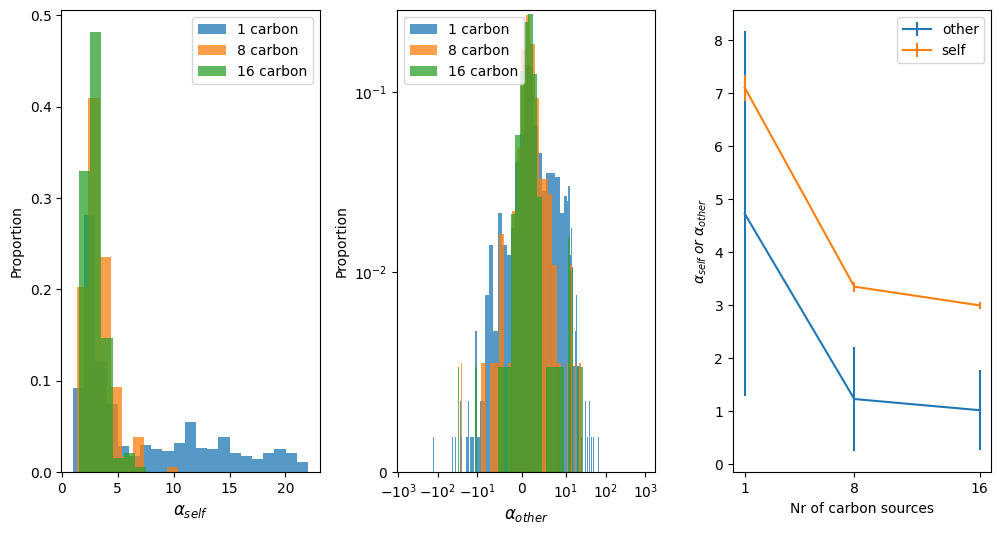

In [8]:
figure(figsize=(12, 6))

subplot(131)
bin_width=1
bins1 = np.arange(start=min(a11_1), stop=max(a11_1) + bin_width, step=bin_width)
histplot(a11_1, stat='proportion',bins=bins1,label='1 carbon', edgecolor='none')

bins2 = np.arange(start=min(a11_8), stop=max(a11_8) + bin_width, step=bin_width)
histplot(a11_8, stat='proportion',bins=bins2,label='8 carbon', edgecolor='none')

bins3 = np.arange(start=min(a11_16), stop=max(a11_16) + bin_width, step=bin_width)
histplot(a11_16, stat='proportion',bins=bins3, label='16 carbon', edgecolor='none')
xlabel(r'$\alpha_{self}$', size=12)
legend()
#yscale('symlog', linthresh=0.1)


subplot(132)
bin_width=1
bins1 = np.arange(start=min(a12_1), stop=max(a12_1) + bin_width, step=bin_width)
histplot(a12_1,bins=bins1, stat='proportion',label='1 carbon', edgecolor='none')

bins2 = np.arange(start=min(a12_8), stop=max(a12_8) + bin_width, step=bin_width)
histplot(a12_8,bins=bins2, stat='proportion',label='8 carbon')

bins3=np.arange(start=min(a12_16), stop=max(a12_16) + bin_width, step=bin_width)
histplot(a12_16,bins=bins3, stat='proportion', label='16 carbon')
xlabel(r'$\alpha_{other}$', size=12)
legend()
yscale('symlog', linthresh=0.01)
xscale('symlog', linthresh=10)

subplot(133)
errorbar([1,8,16],[mean(a12_1),mean(a12_8),mean(a12_16)], yerr=array([std(a12_1),std(a12_8),std(a12_16)])/sqrt([len(a12_1),len(a12_8),len(a12_16)]),label='other')
errorbar([1,8,16],[mean(a11_1),mean(a11_8),mean(a11_16)], yerr=array([std(a11_1),std(a11_8),std(a11_16)])/sqrt([len(a11_1),len(a11_8),len(a11_16)]),label='self')
xticks([1,8,16])
xlabel('Nr of carbon sources')
ylabel(r'$\alpha_{self} \; or\;  \alpha_{other}$')
legend()

subplots_adjust(wspace=.3) 

savefig('./images/alphas_directly.pdf', bbox_inches='tight')

# Bayesian Regression on data

## Bayes for one carbon source

In [ ]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS

#set target to training data

x = torch.tensor(target_1, dtype=torch.float32)  # Training data vector x

n_samples = x.shape[0]  # Number of training samples
dim = x.shape[1]         # Dimensionality

# set diagonal values of interaction matrix to those alphas_self obtained from steady state growth (see above)
a_self_mean=[]
for i in range(14):
    a_self_mean.append(float(mean(a_self_1[i])))

# set diagonal values of interaction matrix
fixed_diag = torch.tensor(a_self_mean, dtype=torch.float32)  # Replace with your known values

# keep variance of diagonal small 
diag_variance = 0.000005  # Small variance for controlled sampling


# define bayesian model 

def model(x):
    # Sample interaction matrix
    A_full = pyro.sample("A_full", dist.Normal(torch.ones(dim, dim), torch.ones(dim, dim)))

    # Create an identity mask to separate diagonal and off-diagonal elements
    identity_mask = torch.eye(dim)

    # Sample diagonal elements separately with constrained priors
    A_diag = pyro.sample("A_diag", dist.Normal(fixed_diag, diag_variance * torch.ones(dim)))

    # Construct final A matrix:
    # - Use A_full for off-diagonal (mask out diagonal)
    # - Use sampled A_diag for diagonal
    A = (1 - identity_mask) * A_full + torch.diag(A_diag)

    # Compute predicted values
    y_pred = (x > 0) * (1 - torch.matmul(A, x.T).T)  

    # Likelihood function
    pyro.sample("y", dist.Normal(y_pred, 0.00001), obs=torch.zeros_like(y_pred))

# Use No-U-Turn Sampler (NUTS) for Bayesian Inference
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_samples=200, warmup_steps=400, num_chains=30)  # num samples=200, warmup steps=400 -> seems to be enough to be stationary or very close to it
mcmc.run(x)

# Get posterior samples
posterior_samples = mcmc.get_samples()
A_off_diag_posterior = posterior_samples["A_full"].mean(dim=0) * (1 - torch.eye(dim))  # Keep only off-diagonal elements
A_diag_posterior = posterior_samples["A_diag"].mean(dim=0)  # Sampled diagonal values

# Reconstruct the final A matrix
A_posterior = A_off_diag_posterior + torch.diag(A_diag_posterior)

In [ ]:
import pickle

#with open('./Bayes_1carb.pkl','wb') as f: 
#   pickle.dump(t1,f)

## Bayes for 8 carbon sources
* same code as for 1 carbon source above, just training data is for 8 species case

In [ ]:

x = torch.tensor(target_8, dtype=torch.float32)  # Training data vector x

n_samples = x.shape[0]  # Number of training samples
dim = x.shape[1]         # Dimensionality

# Given diagonal values
a_self_mean=[]
for i in range(14):
    a_self_mean.append(float(mean(a_self_8[i])))
    
fixed_diag = torch.tensor(a_self_mean, dtype=torch.float32)  # Replace with your known values
diag_variance = 0.000005  # Small variance for controlled sampling



def model(x):
    # Sample a full matrix
    A_full = pyro.sample("A_full", dist.Normal(torch.ones(dim, dim), torch.ones(dim, dim)))

    # Create an identity mask to separate diagonal and off-diagonal elements
    identity_mask = torch.eye(dim)

    # Sample diagonal elements separately with constrained priors
    A_diag = pyro.sample("A_diag", dist.Normal(fixed_diag, diag_variance * torch.ones(dim)))

    # Construct final A matrix:
    # - Use A_full for off-diagonal (mask out diagonal)
    # - Use sampled A_diag for diagonal
    A = (1 - identity_mask) * A_full + torch.diag(A_diag)

    # Compute predicted values
    y_pred = (x > 0) * (1 - torch.matmul(A, x.T).T)  # Hadamard product and matrix multiplication

    # Likelihood function
    pyro.sample("y", dist.Normal(y_pred, 0.00001), obs=torch.zeros_like(y_pred))

# Use No-U-Turn Sampler (NUTS) for Bayesian Inference
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_samples=200, warmup_steps=400, num_chains=30)
mcmc.run(x)

# Get posterior samples
posterior_samples = mcmc.get_samples()
A_off_diag_posterior = posterior_samples["A_full"].mean(dim=0) * (1 - torch.eye(dim))  # Keep only off-diagonal elements
A_diag_posterior = posterior_samples["A_diag"].mean(dim=0)  # Sampled diagonal values

# Reconstruct the final A matrix
A_posterior = A_off_diag_posterior + torch.diag(A_diag_posterior)

In [ ]:
import pickle

#with open('./Bayes_8carb.pkl','wb') as f: 
#   pickle.dump(t8,f)

## Bayes for 16 carbon sources
* same code as for 1 and 8 carbon sources

In [ ]:

# training data
x = torch.tensor(target_16, dtype=torch.float32)  # Training data vector x

n_samples = x.shape[0]  # Number of training samples
dim = x.shape[1]         # Dimensionality

# Given diagonal values
a_self_mean=[]
for i in range(14):
    a_self_mean.append(float(mean(a_self_16[i])))
    
fixed_diag = torch.tensor(a_self_mean, dtype=torch.float32)  # Replace with your known values
diag_variance = 0.000005  # Small variance for controlled sampling



def model(x):
    # Sample a full matrix
    A_full = pyro.sample("A_full", dist.Normal(torch.ones(dim, dim), torch.ones(dim, dim)))

    # Create an identity mask to separate diagonal and off-diagonal elements
    identity_mask = torch.eye(dim)

    # Sample diagonal elements separately with constrained priors
    A_diag = pyro.sample("A_diag", dist.Normal(fixed_diag, diag_variance * torch.ones(dim)))

    # Construct final A matrix:
    # - Use A_full for off-diagonal (mask out diagonal)
    # - Use sampled A_diag for diagonal
    A = (1 - identity_mask) * A_full + torch.diag(A_diag)

    # Compute predicted values
    y_pred = (x > 0) * (1 - torch.matmul(A, x.T).T)  # Hadamard product and matrix multiplication

    # Likelihood function
    pyro.sample("y", dist.Normal(y_pred, 0.00001), obs=torch.zeros_like(y_pred))

# Use No-U-Turn Sampler (NUTS) for Bayesian Inference
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_samples=200, warmup_steps=400, num_chains=30)
mcmc.run(x)

# Get posterior samples
posterior_samples = mcmc.get_samples()
A_off_diag_posterior = posterior_samples["A_full"].mean(dim=0) * (1 - torch.eye(dim))  # Keep only off-diagonal elements
A_diag_posterior = posterior_samples["A_diag"].mean(dim=0)  # Sampled diagonal values

# Reconstruct the final A matrix
A_posterior = A_off_diag_posterior + torch.diag(A_diag_posterior)

In [ ]:
import pickle

#with open('./Bayes_16carb.pkl','wb') as f: 
#   pickle.dump(t16,f)

## plotting alphas

In [ ]:
from matplotlib.pylab import *
import pickle
import seaborn as sns
from pandas import read_csv

with open('./Bayes_1carb.pkl','rb') as f:
    a_1=pickle.load(f)
with open('./Bayes_8carb.pkl','rb') as f:
    a_8=pickle.load(f)
with open('./Bayes_16carb.pkl','rb') as f:
    a_16=pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from pandas import read_csv
import numpy as np

# load species identifiers
specs = read_csv('./strains_for_community_exp_101.csv')

# set up figure and gridspec layout
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.3)

# 1 carbon source
ax1 = fig.add_subplot(gs[0])
im1 = ax1.imshow(a_1, vmin=-1, vmax=5)
ax1.set_xticks(np.arange(14))
ax1.set_xticklabels(specs.iloc[0].values, rotation=90)
ax1.set_yticks(np.arange(14))
ax1.set_yticklabels(specs.iloc[0].values)
ax1.set_title('1 carbon source')

# 8 carbon sources
ax2 = fig.add_subplot(gs[1])
im2 = ax2.imshow(a_8, vmin=-1, vmax=5)
ax2.set_xticks(np.arange(14))
ax2.set_xticklabels(specs.iloc[0].values, rotation=90)
ax2.set_yticks([])
ax2.set_title('8 carbon sources')

# 16 carbon sources
ax3 = fig.add_subplot(gs[2])
im3 = ax3.imshow(a_16, vmin=-1, vmax=5)
ax3.set_xticks(np.arange(14))
ax3.set_xticklabels(specs.iloc[0].values, rotation=90)
ax3.set_yticks([])
ax3.set_title('16 carbon sources')

# shared colorbar with adjusted ticks
cax = fig.add_subplot(gs[3])
cbar = plt.colorbar(im3, cax=cax)

# explicitly set colorbar ticks and labels
cbar.set_ticks([-1, 0, 1, 2, 3, 4, 5])
cbar.set_ticklabels([r'$\leq$ -1', '0', '1', '2', '3', '4', r'$\geq$ 5'])


plt.savefig('./images/interaction_matrices.pdf', bbox_inches='tight')

In [ ]:
# plot all alpha self and alpha other
mask=eye(14)>0

#alpha self
a_self=vstack([a_1.numpy()[mask],a_8.numpy()[mask],a_16.numpy()[mask]])


#alpha other
a_other=vstack([a_1.numpy()[~mask],a_8.numpy()[~mask],a_16.numpy()[~mask]])


figure(figsize=(5,5))
subplot(121)
title(r'$\alpha_{\text{self}}$')
xticks([0,1,2],[1,8,16])
xlabel('number of carbon sources')
plot(a_self, lw=0.4)
errorbar([0,1,2],mean(a_self,axis=1),yerr=std(a_self,axis=1)/sqrt(shape(a_self)[1]),color='k', label=r'$\alpha_{self}$')

subplot(122)
title(r'$\alpha_{\text{other}}$')
xticks([0,1,2],[1,8,16])
xlabel('number of carbon sources')
plot(a_other,lw=.4)
errorbar([0,1,2],mean(a_other,axis=1),yerr=std(a_other,axis=1)/sqrt(shape(a_other)[1]),color='k', label=r'$\alpha_{other}$')
print()
savefig('./images/alphas_vs_carbonsrcnr.pdf', bbox_inches='tight')

In [ ]:
# plot mean alphas vs carbon source diversity

mask=eye(14)>0

#alpha self
a_self=vstack([a_1.numpy()[mask],a_8.numpy()[mask],a_16.numpy()[mask]])

#sns.stripplot(a_self.T)
errorbar([0,1,2],mean(a_self,axis=1),yerr=std(a_self,axis=1)/sqrt(shape(a_self)[1]), label=r'$\alpha_{self}$')

#alpha other

a_other=vstack([a_1.numpy()[~mask],a_8.numpy()[~mask],a_16.numpy()[~mask]])


errorbar([0,1,2],mean(a_other,axis=1),yerr=std(a_other,axis=1)/sqrt(shape(a_other)[1]), label=r'$\alpha_{other}$')
xticks([0,1,2],[1,8,16])
ylabel(r'$\alpha$')
xlabel('number of carbon sources')
legend()
savefig('./images/alphas_vs_nutrients.eps')

# gLV simulations with obtained alphas

In [ ]:
import pickle
from numpy import *
with open('./Bayes_1carb.pkl','rb') as f: 
    t1=pickle.load(f)

with open('./Bayes_8carb.pkl','rb') as f: 
    t8=pickle.load(f)

with open('./Bayes_16carb.pkl','rb') as f: 
    t16=pickle.load(f)

## ensuring steady state of simulation runs


In [ ]:
# run simulation with same setting as done below each run as 50.000 iterations, plotting populations densities at iteration 40.000 against 50.000
from aux import gLV_matrix
repeats=30
species_nr=14
matrices=[t1,t8,t16]
N_fins=zeros((repeats*len(matrices),species_nr,4))

for j in matrices:
    for i in range(repeats):
        N_init=zeros(species_nr)
        N_init[choice(arange(species_nr),6, replace=0)]=.1

        N_f,_=gLV_matrix(t8,N_init)
        N_fins[i,:,0]=N_f[:,-1]
        N_fins[i,:,1]=N_f[:,-100]
        N_fins[i,:,2]=N_f[:,-500]
        N_fins[i,:,3]=N_f[:,-10000]

In [9]:
plot(N_fins[:,:,0],N_fins[:,:,3],'ob', ms=2, zorder=2)
plot([0,1],[0,1],'k--',lw=1, zorder=1)
xlabel('population densities at iteration 50.000')
ylabel('population densities at iteration 40.000')
savefig('./images/test_steady_state.pdf', bbox_inches='tight')

NameError: name 'N_fins' is not defined

## resimulated gLV with obtained interaction matrices

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.stats import entropy
from tqdm import tqdm

def generalized_lotka_volterra(t, N, A):
    return np.heaviside(N,0) * N * (1 - np.dot(A, N))

# resimulate repeats nr of randomly chosen communities
repeats=2000

# nr of species
Nr=14

N_inits=[]
resm=np.zeros((3,repeats))
res_sh=np.zeros((3,repeats))

for i in tqdm(range(repeats)):

    # Initial populations
    N_init = np.random.uniform(0.0, .1, size=Nr)
    mask=np.random.uniform(0.0, 1., size=Nr)>0.4
    N_init[~mask]=0
    N_inits.append(N_init!=0)

    # Time span for simulation
    t_span = (0, 1000)  
    t_eval = np.linspace(*t_span, 50000)  
    
# one carbon source
    solution = solve_ivp(
        generalized_lotka_volterra,
        t_span,
        N_init,
        args=( [t1]),
        t_eval=t_eval,
        method='RK45'
    )
    
    # Extract results
    time = solution.t
    N = solution.y
    # count number of surviving species
    resm[0,i]=sum(N[:,-1]>.01)

    # calculate shannon entropy of final community
    te=N[:,-1]
    te[te<0]=0
    res_sh[0,i]=entropy(te/sum(te))

# 8 carbon source
    solution = solve_ivp(
        generalized_lotka_volterra,
        t_span,
        N_init,
        args=( [t8]),
        t_eval=t_eval,
        method='RK45'
    )
    
    # Extract results
    time = solution.t
    N = solution.y
    resm[1,i]=sum(N[:,-1]>.01)
    te=N[:,-1]
    te[te<0]=0
    res_sh[1,i]=entropy(te/sum(te))
    
## 16 carbon sources
    solution = solve_ivp(
        generalized_lotka_volterra,
        t_span,
        N_init,
        args=( [t16]),
        t_eval=t_eval,
        method='RK45'
    )
    
    # Extract results
    time = solution.t
    N = solution.y
    resm[2,i]=sum(N[:,-1]>.01)
    
    te=N[:,-1]
    te[te<0]=0
    res_sh[2,i]=entropy(te/sum(te))

ModuleNotFoundError: No module named 'scipy'

In [11]:
import pickle

#with open('./gLV_shannon.pkl','wb') as f: 
#    pickle.dump(res_sh,f)

#with open('./gLV_richness.pkl','wb') as f: 
#    pickle.dump(resm,f)

In [12]:
import pickle

with open('./gLV_shannon.pkl','rb') as f: 
    res_sh=pickle.load(f)

with open('./gLV_richness.pkl','rb') as f: 
    resm=pickle.load(f)

ModuleNotFoundError: No module named 'numpy._core'

NameError: name 'res_sh' is not defined

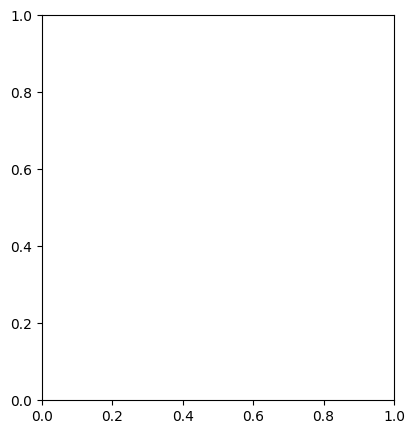

In [13]:
from seaborn import stripplot, lineplot

plt.figure(figsize=(10,5))
plt.subplot(121)

stripplot(res_sh.T,size=1, alpha=0.3)
errorbar([0,1,2],res_sh.mean(axis=1),yerr=res_sh.std(axis=1)/sqrt(shape(res_sh)[1]))
plt.xticks([0,1,2],[1,8,16])
plt.xlabel('# carbon sources')
plt.ylabel('Shannon Index')

plt.subplot(122)
stripplot(resm.T,size=1, alpha=0.3)
errorbar([0,1,2],resm.mean(axis=1),yerr=res_sh.std(axis=1)/sqrt(shape(res_sh)[1]))
plt.xlabel('# carbon sources')
plt.ylabel('Richness')

savefig('./images/Shannon_vs_nutrient_raw.pdf', bbox_inches='tight')

## gLV with fitted alphas changing community size

In [14]:
import pickle

with open('./Bayes_1carb.pkl','rb') as f: 
    t1=pickle.load(f)

with open('./Bayes_8carb.pkl','rb') as f: 
    t8=pickle.load(f)

with open('./Bayes_16carb.pkl','rb') as f: 
    t16=pickle.load(f)

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.stats import entropy
from tqdm import tqdm

def generalized_lotka_volterra(t, N, A):
    return np.heaviside(N,0) * N * (1 - np.dot(A, N))

repeats=100
Nr=14
initials=[0.05,0.1,0.3,0.6,0.7,0.9]

N_inits=[]
resm=np.zeros((3,repeats,len(initials)))
res_sh=np.zeros((3,repeats,len(initials)))

for j in tqdm(range(len(initials)), desc="Processing"):
    for i in range(repeats):

        # Initial populations
        N_init = np.random.uniform(0.0, .1, size=Nr)
        mask=np.random.uniform(0.0, 1., size=Nr)>initials[j]
        N_init[~mask]=0
        N_inits.append(N_init!=0)

        # Time span for simulation
        t_span = (0, 1000)  
        t_eval = np.linspace(*t_span, 50000)  
    
    # one carbon source
        solution = solve_ivp(
        generalized_lotka_volterra,
        t_span,
        N_init,
        args=( [t1]),
        t_eval=t_eval,
        method='RK45'
        )
    
        # Extract results
        time = solution.t
        N = solution.y
        resm[0,i,j]=sum(N[:,-1]>.01)
        te=N[:,-1]
        te[te<0]=0
        if sum(te)!=0:
            res_sh[0,i,j]=entropy(te/sum(te))
        else: 
            res_sh[0,i,j]=0

    # 8 carbon source
        solution = solve_ivp(
        generalized_lotka_volterra,
        t_span,
        N_init,
        args=( [t8]),
        t_eval=t_eval,
        method='RK45'
    )
    
        # Extract results
        time = solution.t
        N = solution.y
        resm[1,i,j]=sum(N[:,-1]>.01)
        te=N[:,-1]
        te[te<0]=0
        if sum(te)!=0:
            res_sh[1,i,j]=entropy(te/sum(te))
        else: 
            res_sh[1,i,j]=0
        
    ## 16 carbon sources
        solution = solve_ivp(
            generalized_lotka_volterra,
            t_span,
            N_init,
            args=( [t16]),
            t_eval=t_eval,
            method='RK45'
        )
        
        # Extract results
        time = solution.t
        N = solution.y
        resm[2,i,j]=sum(N[:,-1]>.01)
        
        te=N[:,-1]
        te[te<0]=0
        if sum(te)!=0:
            res_sh[2,i,j]=entropy(te/sum(te))
        else: 
            res_sh[2,i,j]=0

ModuleNotFoundError: No module named 'scipy'

NameError: name 'initials' is not defined

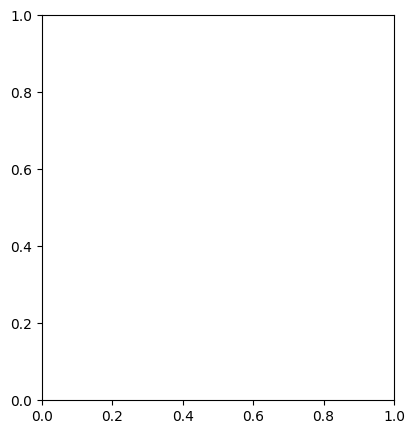

In [16]:
from seaborn import stripplot, lineplot

plt.figure(figsize=(10,5))
plt.subplot(121)

cmap = plt.get_cmap('tab10')
labels=around((1-array(initials))*14,2)
for i in range(len(initials)):
    stripplot(res_sh[:,:,i].T,size=3, alpha=0.5, color=cmap(i))
    lineplot(res_sh[:,:,i].mean(axis=1), color=cmap(i),alpha=1,  label=labels[i])

legend(bbox_to_anchor=(2.55,1), title="initial mean\n number\n of species")
plt.title('Shannon')
plt.xlabel('# carbon sources')
plt.ylabel('Shannon')




plt.subplot(122)
for i in range(len(initials)):
    stripplot(resm[:,:,i].T,size=3 , alpha=0.5, color=cmap(i))
    plot(resm.mean(axis=1)[:,i],color=cmap(i))
legend().remove()

plt.xlabel('# carbon sources')
plt.ylabel('Richness')
plt.title('Richness')

savefig('./images/diversity_loss_vs_initial_species_nr.pdf', bbox_inches='tight')

## simulate single strains' relative growth change

In [17]:
import pickle

with open('./Bayes_1carb.pkl','rb') as f: 
    t1=pickle.load(f)

with open('./Bayes_8carb.pkl','rb') as f: 
    t8=pickle.load(f)

with open('./Bayes_16carb.pkl','rb') as f: 
    t16=pickle.load(f)

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.stats import entropy

def generalized_lotka_volterra(t, N, A):
    return np.heaviside(N,0) * N * (1 - np.dot(A, N))

Nr=14

resm=np.zeros((3,Nr,Nr,Nr))


for i in range(Nr): 
    for j in range(Nr):  
            N_init=np.zeros(14)
            N_init[i]=.1
            N_init[j]=.1

            # Time span for simulation
            t_span = (0, 1000)  
            t_eval = np.linspace(*t_span, 50000)  
        
        # one carbon source
            solution = solve_ivp(
            generalized_lotka_volterra,
            t_span,
            N_init,
            args=( [t1]),
            t_eval=t_eval,
            method='RK45'
            )
        
            # Extract results
            time = solution.t
            N = solution.y
            resm[0,i,j,:]=N[:,-1]
          
    
        # 8 carbon source
            solution = solve_ivp(
            generalized_lotka_volterra,
            t_span,
            N_init,
            args=( [t8]),
            t_eval=t_eval,
            method='RK45'
        )
        
            # Extract results
            time = solution.t
            N = solution.y
            resm[1,i,j,:]=N[:,-1]
            
        ## 16 carbon sources
            solution = solve_ivp(
                generalized_lotka_volterra,
                t_span,
                N_init,
                args=( [t16]),
                t_eval=t_eval,
                method='RK45'
            )
            
            # Extract results
            time = solution.t
            N = solution.y
            resm[2,i,j,:]=N[:,-1]
            
  

ModuleNotFoundError: No module named 'scipy'

In [19]:
rg_tot_1=[]
rg_tot_8=[]
rg_tot_16=[]


for i in range(Nr): 
    single1=resm[0,i,i,i]
    rg_tot_1.append(resm[0,i,:,i]/single1)

for i in range(Nr): 
    single8=resm[1,i,i,i]
    rg_tot_8.append(resm[1,i,:,i]/single8)

for i in range(Nr): 
    single16=resm[2,i,i,i]
    rg_tot_16.append(resm[2,i,:,i]/single16)

NameError: name 'Nr' is not defined

In [20]:
from numpy import array
from matplotlib.pylab import *
rg_tot_1a=array(rg_tot_1)
rg_tot_8a=array(rg_tot_8)
rg_tot_16a=array(rg_tot_16)

TypeError: Invalid shape (0,) for image data

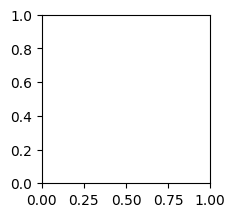

In [21]:
figure(figsize=(10,5))
subplot(141)
imshow(rg_tot_1a)
subplot(142)
imshow(rg_tot_8a)
subplot(143)
imshow(rg_tot_16a)
#colorbar(shrink=0.3)

-> row: same effected species, column: same effector species

In [22]:
from pandas import DataFrame
st=read_csv('./strains_for_community_exp_101.csv')

rg_stack_m=vstack([mean(rg_tot_1a,axis=0),mean(rg_tot_8a,axis=0),mean(rg_tot_16a,axis=0)])
df_m=DataFrame(rg_stack_m, columns=st.iloc[0])

rg_stack_sem=vstack([std(rg_tot_1a,axis=0)/sqrt(shape(rg_tot_1a)[1]),std(rg_tot_8a,axis=0)/sqrt(shape(rg_tot_8a)[1]),std(rg_tot_16a,axis=0)/shape(rg_tot_16a)[1]])
df_sem=DataFrame(rg_stack_sem, columns=st.iloc[0])

column_means = df_m.mean()


# Sort columns by mean values
sorted_columns = column_means.sort_values().index  # Get sorted column names


# Rearrange the DataFrame columns
df_m_sorted = df_m[sorted_columns]
df_sem_sorted = df_sem[sorted_columns]

/Users/oshalev/mambaforge/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/oshalev/mambaforge/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Shape of passed values is (3, 1), indices imply (3, 14)

In [ ]:
from pandas import read_csv

gs=GridSpec(2,7,wspace=.7)

fig=figure(figsize=(10,5))
for i in range(14):
    ax = fig.add_subplot(gs[i])

    errorbar([0,1,2],df_m_sorted.iloc[:,i],yerr=df_sem_sorted.iloc[:,i])
    yscale('log')
    
    if i==0 or i==7:
        ylabel('mean growth impact')
    else:
        ylabel('')

    if i<7:
        xticks([])
    else:
        xticks([0,1,2],[1,8,16])
        xlabel(' carbon \n sources')
    
    
    ylim([.1,1.2])
    
    title(str(df_m_sorted.keys()[i]))

savefig('./images/resimulated_growth_impact.pdf',bbox_inches='tight')

# obtain shapley values from gLV simulations

In [23]:
%load_ext autoreload
%autoreload 2
    
from matplotlib.pylab import *  
from numpy import *
from aux import  noised_matrix, relative_growth, generate_vectors, process_species_set, generate_random_matrices
from tqdm import tqdm
from scipy.stats import entropy
import multiprocessing as mp
import pickle

with open('./Bayes_1carb.pkl','rb') as f: 
    t1=pickle.load(f)

with open('./Bayes_8carb.pkl','rb') as f: 
    t8=pickle.load(f)

with open('./Bayes_16carb.pkl','rb') as f: 
    t16=pickle.load(f)

ModuleNotFoundError: No module named 'scipy'

In [2]:
# make community simulations for 6 species communities 

species_nr = 14 # size of total species pool 
species_sets = 400  # number of species sets with size species_nr that are generated, i.e. number of interaction matrices that are generated
species_pick=6  # number of species that are chosen from species poop (species_nr)


with mp.Pool(processes=mp.cpu_count()) as pool:   # perform parallel computing, e.g. run on strong CPU
    results = list(tqdm(pool.starmap(
        process_species_set, 
        [(i, generate_vectors(species_nr,species_pick), species_nr, *generate_random_matrices(t1, t8, t16)) for i in range(species_sets)]
    ), total=species_sets))

# Unpacking results
species_abundances1 = np.array([r[0] for r in results])
species_abundances16 = np.array([r[1] for r in results])
relative_growth_arr = np.array([r[2] for r in results])
entropies_arr = np.array([r[3] for r in results])

# Collect the randomized matrices
t1_rand_arr = np.array([r[4] for r in results])
t16_rand_arr = np.array([r[5] for r in results])

# obtaine initial binary vector
binary_vectors_arr=np.array([r[6] for r in results])



100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 69615.00it/s]


In [5]:
# save results for 6 species communities

'''
# Pack the arrays into a dictionary
data_to_save = {
    'species_abundances1': species_abundances1,
    'species_abundances16': species_abundances16,
    'relative_growth_arr': relative_growth_arr,
    'entropies_arr': entropies_arr,
    't1_rand_arr': t1_rand_arr,
    't16_rand_arr': t16_rand_arr,
    'binary_vectors_arr': binary_vectors_arr
}

# Save to pickle file
with open('arrays_data_6.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)


In [4]:
# make simulations for 8 species communities
species_nr = 14 # size of total species pool 
species_sets = 400  # number of species sets with size species_nr that are generated, i.e. number of interaction matrices that are generated
species_pick=8  # number of species that are chosen from species poop (species_nr)


with mp.Pool(processes=mp.cpu_count()) as pool:   # perform parallel computing, e.g. run on strong CPU
    results = list(tqdm(pool.starmap(
        process_species_set, 
        [(i, generate_vectors(species_nr,species_pick), species_nr, *generate_random_matrices(t1, t8, t16)) for i in range(species_sets)]
    ), total=species_sets))

# Unpacking results
species_abundances1 = np.array([r[0] for r in results])
species_abundances16 = np.array([r[1] for r in results])
relative_growth_arr = np.array([r[2] for r in results])
entropies_arr = np.array([r[3] for r in results])

# Collect the randomized matrices
t1_rand_arr = np.array([r[4] for r in results])
t16_rand_arr = np.array([r[5] for r in results])

# obtaine initial binary vector
binary_vectors_arr=np.array([r[6] for r in results])

100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 70492.50it/s]


In [7]:
# save results for 8 species communities

'''
# Pack the arrays into a dictionary
data_to_save = {
    'species_abundances1': species_abundances1,
    'species_abundances16': species_abundances16,
    'relative_growth_arr': relative_growth_arr,
    'entropies_arr': entropies_arr,
    't1_rand_arr': t1_rand_arr,
    't16_rand_arr': t16_rand_arr,
    'binary_vectors_arr': binary_vectors_arr
}

# Save to pickle file
with open('arrays_data_8.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)

In [5]:
## load saved data
#-------------------------------------

import pickle

# Load the data back from pickle file ( for 6 species communities)
with open('arrays_data_6.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Restore arrays with original names
species_abundances1_6 = loaded_data['species_abundances1']
species_abundances16_6 = loaded_data['species_abundances16']
relative_growth_arr_6 = loaded_data['relative_growth_arr']
entropies_arr_6 = loaded_data['entropies_arr']
t1_rand_arr_6 = loaded_data['t1_rand_arr']
t16_rand_arr_6 = loaded_data['t16_rand_arr']
binary_vectors_arr_6 = loaded_data['binary_vectors_arr']


# Load the data back from pickle file (for 8 species communities)
with open('arrays_data_8.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Restore arrays with original names
species_abundances1_8 = loaded_data['species_abundances1']
species_abundances16_8 = loaded_data['species_abundances16']
relative_growth_arr_8 = loaded_data['relative_growth_arr']
entropies_arr_8 = loaded_data['entropies_arr']
t1_rand_arr_8 = loaded_data['t1_rand_arr']
t16_rand_arr_8 = loaded_data['t16_rand_arr']
binary_vectors_arr_8 = loaded_data['binary_vectors_arr']
    

In [6]:


# for 6 species
#------------------------
# Compute mean (across 1 and 16 carbon sources) and difference (between 1 and 16 carbon sources) in relative growth impact
mean_rel_growth_6 = np.mean(relative_growth_arr_6[:, [0, 1], :], axis=1)
ini_rel_growth_6 = relative_growth_arr_6[:, 0, :]  # relative growth (growth impact) for 1 carbon source
diff_rel_growth_6 = relative_growth_arr_6[:, 1, :] - relative_growth_arr_6[:, 0, :]

#clean up entropies
entropies_arr_6[entropies_arr_6==-inf]=0  #when abundances are all zero entropy becomes - inf correct to 0
entropies_arr_6[isnan(entropies_arr_6)]=0 #.. or nan correct also to zero

# calculate chagne of entropy between 16 and 1 carbon source
entropy_diff_6=entropies_arr_6[:,1,:]-entropies_arr_6[:,0,:]


# for 8 species
#----------------------------------
# Compute mean (across 1 and 16 carbon sources) and difference (between 1 and 16 carbon sources) in relative growth impact
mean_rel_growth_8 = np.mean(relative_growth_arr_8[:, [0, 1], :], axis=1)
ini_rel_growth_8 = relative_growth_arr_8[:, 0, :]  # relative growth (growth impact) for 1 carbon source
diff_rel_growth_8 = relative_growth_arr_8[:, 1, :] - relative_growth_arr_8[:, 0, :]

#clean up entropies
entropies_arr_8[entropies_arr_8==-inf]=0  #when abundances are all zero entropy becomes - inf correct to 0
entropies_arr_8[isnan(entropies_arr_8)]=0 #.. or nan correct also to zero

# calculate chagne of entropy between 16 and 1 carbon source
entropy_diff_8=entropies_arr_8[:,1,:]-entropies_arr_8[:,0,:]

In [7]:
# calculate Shapley values 
from aux import shapley_values

## for 6 species
#---------------
leng=len(entropy_diff_6)
shaps_6=zeros([leng,14])  # make vector of zeros to store Shapley values for each species
for i in tqdm(range(leng)):  
    shaps_6[i,:]=shapley_values(binary_vectors_arr_6[i],entropy_diff_6[i])  # perform shapley analysis across all communities

# select shapley values only of those  species that were present in the community (the others are zero anyway)
shaps_selected_6=[]
diff_rel_growth_selected_6=[]
mean_rel_growth_selected_6=[]
ini_rel_growth_selected_6=[]
for i in range(len(binary_vectors_arr_6)):
    shaps_selected_6.append(shaps_6[i][binary_vectors_arr_6[i,-1].astype(bool)])
    diff_rel_growth_selected_6.append(diff_rel_growth_6[i][binary_vectors_arr_6[i,-1].astype(bool)])
    mean_rel_growth_selected_6.append(mean_rel_growth_6[i][binary_vectors_arr_6[i,-1].astype(bool)])
    ini_rel_growth_selected_6.append(ini_rel_growth_6[i][binary_vectors_arr_6[i,-1].astype(bool)])


## for 8 species
#-------------------
leng=len(entropy_diff_8)
shaps_8=zeros([leng,14])  # make vector of zeros to store Shapley values for each species
for i in tqdm(range(leng)):  
    shaps_8[i,:]=shapley_values(binary_vectors_arr_8[i],entropy_diff_8[i])  # perform shapley analysis across all communities

# select shapley values only of those  species that were present in the community (the others are zero anyway)
shaps_selected_8=[]
diff_rel_growth_selected_8=[]
mean_rel_growth_selected_8=[]
ini_rel_growth_selected_8=[]
for i in range(len(binary_vectors_arr_8)):
    shaps_selected_8.append(shaps_8[i][binary_vectors_arr_8[i,-1].astype(bool)])
    diff_rel_growth_selected_8.append(diff_rel_growth_8[i][binary_vectors_arr_8[i,-1].astype(bool)])
    mean_rel_growth_selected_8.append(mean_rel_growth_8[i][binary_vectors_arr_8[i,-1].astype(bool)])
    ini_rel_growth_selected_8.append(ini_rel_growth_8[i][binary_vectors_arr_8[i,-1].astype(bool)])

100%|█████████████████████████████████████████| 400/400 [00:06<00:00, 63.90it/s]


In [8]:
### remove communities that blew up 
#------

# for 6 species
#---
remov1_6=amax(species_abundances1_6,axis=(1,2))<5
remov16_6=amax(species_abundances1_6,axis=(1,2))<5

# remove communities for which relative_growth in pairs blew up
remov_p_6=amax(relative_growth_arr_6, axis=(1,2))<2
remov_6=remov1_6 & remov16_6 & remov_p_6

# clean up results for 6 species communities
shaps_selected_clean_6=array(shaps_selected_6)[remov_6]
diff_rel_growth_selected_clean_6=array(diff_rel_growth_selected_6)[remov_6]
mean_rel_growth_selected_clean_6=array(mean_rel_growth_selected_6)[remov_6]
ini_rel_growth_selected_clean_6=array(ini_rel_growth_selected_6)[remov_6]

# for 8 species
#--
remov1_8=amax(species_abundances1_8,axis=(1,2))<5
remov16_8=amax(species_abundances1_8,axis=(1,2))<5

# remove communities for which relative_growth in pairs blew up
remov_p_8=amax(relative_growth_arr_8, axis=(1,2))<2
remov_8=remov1_8 & remov16_8 & remov_p_8

# clean up results for 8 species communities
shaps_selected_clean_8=array(shaps_selected_8)[remov_8]
diff_rel_growth_selected_clean_8=array(diff_rel_growth_selected_8)[remov_8]
mean_rel_growth_selected_clean_8=array(mean_rel_growth_selected_8)[remov_8]
ini_rel_growth_selected_clean_8=array(ini_rel_growth_selected_8)[remov_8]

In [205]:
# save shapley values and associated stuff
#----
# Pack the arrays into a dictionary
'''
data_to_save = {
    'shaps_selected_6': shaps_selected_6,
    'shaps_selected_8': shaps_selected_8,
    'diff_rel_growth_selected_clean_6': diff_rel_growth_selected_clean_6,
    'diff_rel_growth_selected_clean_8': diff_rel_growth_selected_clean_8,
    'mean_rel_growth_selected_clean_6': mean_rel_growth_selected_clean_6,
    'mean_rel_growth_selected_clean_8': mean_rel_growth_selected_clean_8,
    'ini_rel_growth_selected_clean_6': ini_rel_growth_selected_clean_6,
    'ini_rel_growth_selected_clean_8': ini_rel_growth_selected_clean_8,
}

# Save to pickle file
with open('Shaps_data.pkl', 'wb') as f:
    pickle.dump(data_to_save, f)

In [9]:
import pickle

# Load the data back from pickle file ( for 6 species communities)
with open('Shaps_data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Restore arrays with original names
shaps_selected_6 = loaded_data['shaps_selected_6']
shaps_selected_8 = loaded_data['shaps_selected_8']
diff_rel_growth_selected_clean_6 = loaded_data['diff_rel_growth_selected_clean_6']
diff_rel_growth_selected_clean_8 = loaded_data['diff_rel_growth_selected_clean_8']
mean_rel_growth_selected_clean_6 = loaded_data['mean_rel_growth_selected_clean_6']
mean_rel_growth_selected_clean_8 = loaded_data['mean_rel_growth_selected_clean_8']
ini_rel_growth_selected_clean_6 = loaded_data['ini_rel_growth_selected_clean_6']
ini_rel_growth_selected_clean_8 = loaded_data['ini_rel_growth_selected_clean_8']


Text(0, 0.5, 'Shapley value')

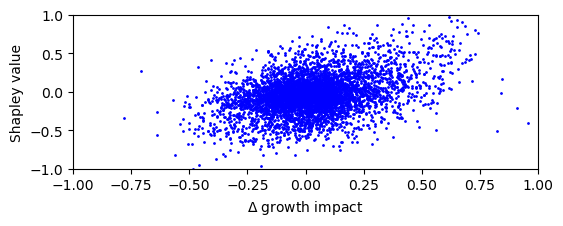

In [10]:
figure(figsize=(6,2))
size=1
scatter(diff_rel_growth_selected_clean_6,shaps_selected_clean_6, alpha=1, s=size, c='b')
scatter(diff_rel_growth_selected_clean_8,shaps_selected_clean_8, alpha=1, s=size, c='b')
ylim([-1,1])
xlim([-1,1])
xlabel(r'$\Delta$ growth impact')
ylabel('Shapley value')

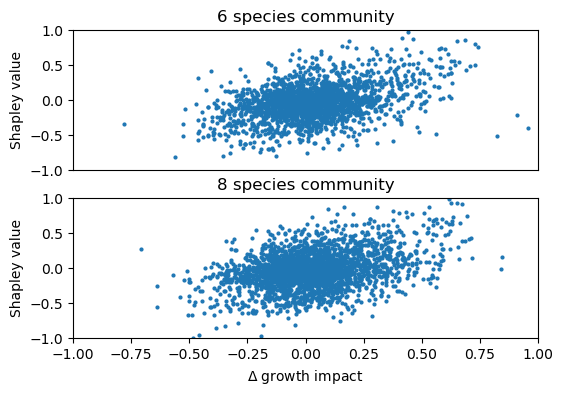

In [11]:
figure(figsize=(6,4))
size=4
subplot(211)
scatter(diff_rel_growth_selected_clean_6,shaps_selected_clean_6, alpha=1, s=size)
title('6 species community')
ylim([-1,1])
xlim([-1,1])
xticks([])
ylabel('Shapley value')

subplot(212)
scatter(diff_rel_growth_selected_clean_8,shaps_selected_clean_8, alpha=1, s=size)
title('8 species community')
ylim([-1,1])
xlim([-1,1])
xlabel(r'$\Delta$ growth impact')
ylabel('Shapley value')
savefig('./images/Shapley_6_vs_8.pdf', bbox_inches='tight')

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_843032/3810385568.py:5: SyntaxWarning: invalid escape sequence '\D'
  xlabel('$\Delta$ entropy')


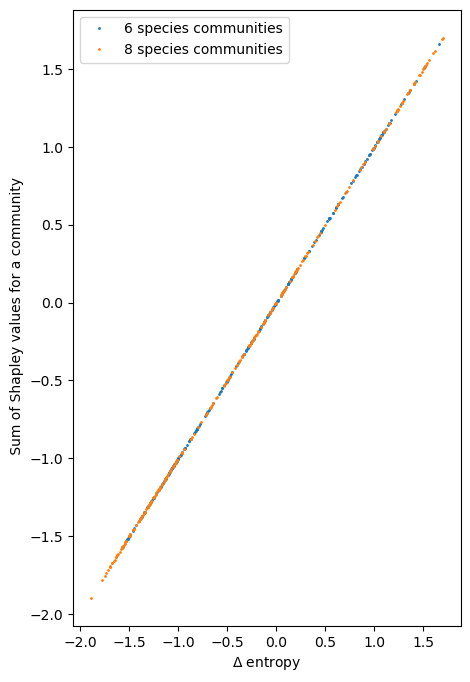

In [18]:
figure(figsize=(5,8))
plot(entropy_diff_6[:,-1][remov_6],sum(shaps_selected_clean_6, axis=1),'.',ms=2, label='6 species communities')
plot(entropy_diff_8[:,-1][remov_8],sum(shaps_selected_clean_8, axis=1),'.',ms=2, label='8 species communities')
legend()
xlabel('$\Delta$ entropy')
ylabel(' Sum of Shapley values for a community')

savefig('./images/Shapley_sum_vs_function', bbox_inches='tight')

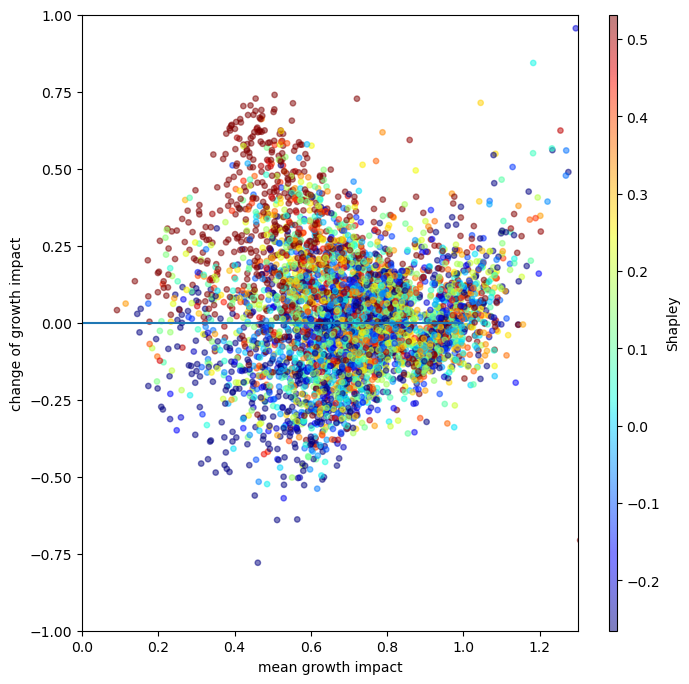

In [14]:
from matplotlib.pylab import *

figure(figsize=(8,8))
for i in range(len(mean_rel_growth_selected_clean_6)): 
    scatter(mean_rel_growth_selected_clean_6[i],diff_rel_growth_selected_clean_6[i], c=shaps_selected_clean_6[i],cmap='jet', s=15, alpha=0.5)

for i in range(len(mean_rel_growth_selected_clean_8)): 
    scatter(mean_rel_growth_selected_clean_8[i],diff_rel_growth_selected_clean_8[i], c=shaps_selected_clean_8[i],cmap='jet', s=15, alpha=0.5)
   

hlines(0,0,1.)
xlim([0,1.3])
ylim([-1,1])
xlabel('mean growth impact')
ylabel('change of growth impact')
colorbar(label=('Shapley'), aspect=80)
savefig('./images/shaps.pdf', bbox_inches='tight')


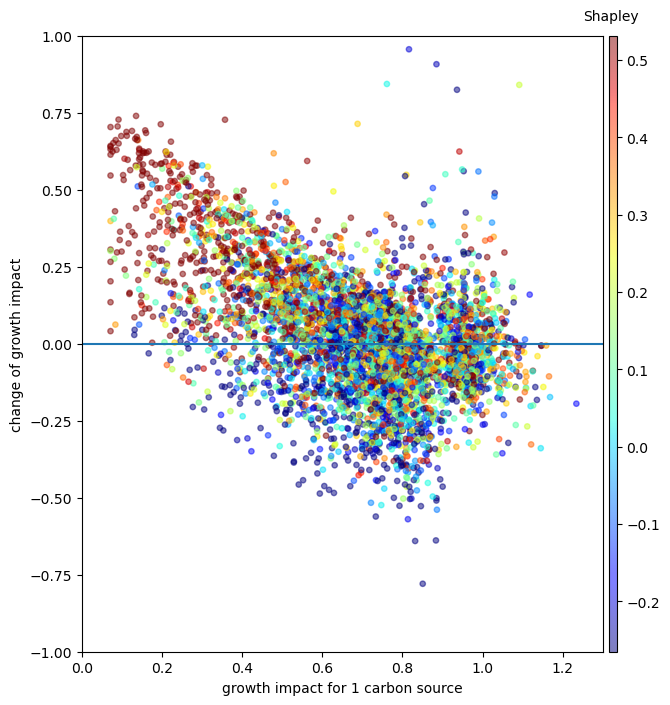

In [15]:
from matplotlib.pylab import *

figure(figsize=(8,8))


for i in range(len(mean_rel_growth_selected_clean_6)): 
    scatter(ini_rel_growth_selected_clean_6[i],diff_rel_growth_selected_clean_6[i], c=shaps_selected_clean_6[i],cmap='jet', s=15, alpha=0.5)
for i in range(len(mean_rel_growth_selected_clean_8)): 
    scatter(ini_rel_growth_selected_clean_8[i],diff_rel_growth_selected_clean_8[i], c=shaps_selected_clean_8[i],cmap='jet', s=15, alpha=0.5)
   

hlines(0,0,1.3)
xlim([0,1.3])
ylim([-1,1])
xlabel('growth impact for 1 carbon source')
ylabel('change of growth impact')
co=colorbar( aspect=80,pad=0.01)
text(1.25,1.05,'Shapley')
savefig('./images/shaps_ini.pdf', bbox_inches='tight')

/tmp/ipykernel_843032/3571273297.py:5: UserWarning: 
The palette list has fewer values (20) than needed (50) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(shaps_selected_clean_6[:maxx].T, s=3, palette=palette)


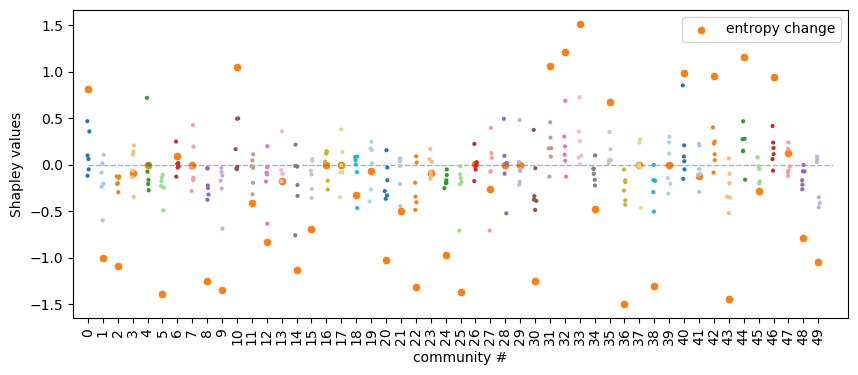

In [16]:
import seaborn as sns
figure(figsize=(10,4))
maxx=50
palette = sns.color_palette("tab20")
sns.stripplot(shaps_selected_clean_6[:maxx].T, s=3, palette=palette)
sns.scatterplot(sum(shaps_selected_clean_6[:maxx], axis=1), label='entropy change')
hlines(0,0,maxx, lw=1,alpha=0.5,linestyles='dashed')
xticks(rotation=90)
xlabel('community #')
ylabel('Shapley values')
xlim([-1,maxx+1])
savefig('./images/shaps_examples.pdf', bbox_inches='tight')

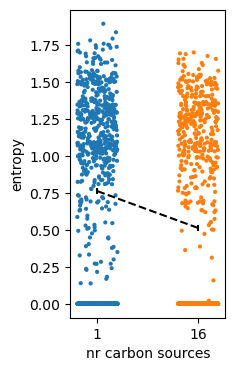

In [17]:
from seaborn import stripplot

figure(figsize=(2,4))
entropies_1ca=vstack([entropies_arr_6[:,0,-1],entropies_arr_8[:,0,-1]]).flatten()
entropies_16ca=vstack([entropies_arr_6[:,1,-1],entropies_arr_8[:,1,-1]]).flatten()

stripplot([entropies_1ca,entropies_16ca],jitter=.2, zorder=1,s=3)

errorbar([0,1],mean([entropies_1ca,entropies_16ca], axis=1), yerr=std([entropies_1ca,entropies_16ca],axis=1)/sqrt(len(entropies_1ca)),zorder=2,fmt='k--')
xticks([0,1],[1,16])
ylabel('entropy')
xlabel('nr carbon sources')
savefig('./images/Shapley_entropy.pdf', bbox_inches='tight')